In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zepto-inventory-dataset/zepto_v2.csv
/kaggle/input/zepto-inventory-dataset/zepto_v1.xlsx


In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("/kaggle/input/zepto-inventory-dataset/zepto_v2.csv", encoding='ISO-8859-1')

In [4]:
df.sample(5)

,Category,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity
2836,Personal Care,Godrej Protekt,9900,0,3,9900,750,False,750
2895,Personal Care,Dove Hair Fall Rescue Conditioner,19000,0,4,19000,175,False,175
3543,Home & Cleaning,Scotch Brite Sponge Wipe,33000,10,6,29700,290,False,5
1260,Beverages,Amul Processed Cheese Cubes,10600,4,6,10100,200,False,200
1252,Beverages,Mother Dairy Ultra Full Cream Milk,3100,0,4,3100,500,False,500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3732 entries, 0 to 3731
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Category                3732 non-null   object
 1   name                    3732 non-null   object
 2   mrp                     3732 non-null   int64 
 3   discountPercent         3732 non-null   int64 
 4   availableQuantity       3732 non-null   int64 
 5   discountedSellingPrice  3732 non-null   int64 
 6   weightInGms             3732 non-null   int64 
 7   outOfStock              3732 non-null   bool  
 8   quantity                3732 non-null   int64 
dtypes: bool(1), int64(6), object(2)
memory usage: 237.0+ KB


In [6]:
df["Category"].nunique()

14

In [7]:
df["name"].nunique()

1681

In [8]:
df["outOfStock"].nunique()

2

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

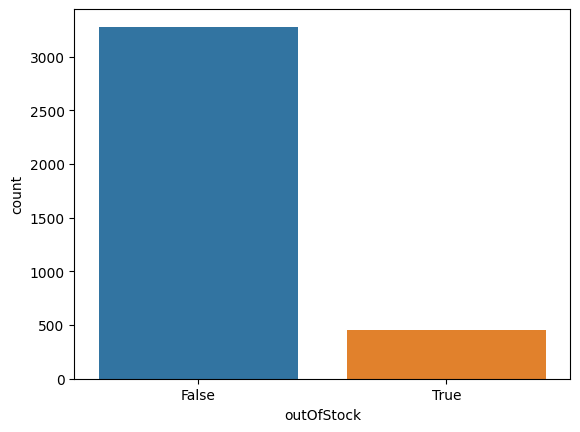

In [10]:
sns.countplot(x='outOfStock', data=df)
plt.show()

In [11]:
# imbalanced dataset

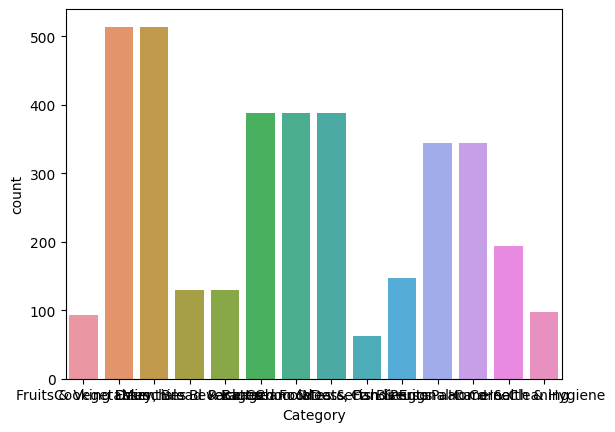

In [12]:
sns.countplot(x='Category', data=df)
plt.show()

In [13]:
df["Category"].value_counts()

Category
Cooking Essentials       514
Munchies                 514
Packaged Food            388
Ice Cream & Desserts     388
Chocolates & Candies     388
Personal Care            344
Paan Corner              344
Home & Cleaning          194
Biscuits                 147
Dairy, Bread & Batter    129
Beverages                129
Health & Hygiene          97
Fruits & Vegetables       93
Meats, Fish & Eggs        63
Name: count, dtype: int64

In [14]:
# One-hot encoding with multiple categories

list_top_10= df.Category.value_counts().sort_values(ascending=False).head(15).index
list_top_10

Index(['Cooking Essentials', 'Munchies', 'Packaged Food',
       'Ice Cream & Desserts', 'Chocolates & Candies', 'Personal Care',
       'Paan Corner', 'Home & Cleaning', 'Biscuits', 'Dairy, Bread & Batter',
       'Beverages', 'Health & Hygiene', 'Fruits & Vegetables',
       'Meats, Fish & Eggs'],
      dtype='object', name='Category')

In [15]:
for category in list_top_10:
    df[category]=np.where(df["Category"]==category,1,0)
df.head()

,Category,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity,Cooking Essentials,...,Chocolates & Candies,Personal Care,Paan Corner,Home & Cleaning,Biscuits,"Dairy, Bread & Batter",Beverages,Health & Hygiene,Fruits & Vegetables,"Meats, Fish & Eggs"
0,Fruits & Vegetables,Onion,2500,16,3,2100,1000,False,1,0,...,0,0,0,0,0,0,0,0,1,0
1,Fruits & Vegetables,Tomato Hybrid,4200,16,3,3500,1000,False,1,0,...,0,0,0,0,0,0,0,0,1,0
2,Fruits & Vegetables,Tender Coconut,5100,15,3,4300,58,False,1,0,...,0,0,0,0,0,0,0,0,1,0
3,Fruits & Vegetables,Coriander Leaves,2000,15,3,1700,100,False,100,0,...,0,0,0,0,0,0,0,0,1,0
4,Fruits & Vegetables,Ladies Finger,1400,14,3,1200,250,False,250,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
df.drop(["Category", "name"], axis=1, inplace=True)
df.head()

# name is dropped because there are a lot of categories which didn't really made any sense

,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity,Cooking Essentials,Munchies,Packaged Food,...,Chocolates & Candies,Personal Care,Paan Corner,Home & Cleaning,Biscuits,"Dairy, Bread & Batter",Beverages,Health & Hygiene,Fruits & Vegetables,"Meats, Fish & Eggs"
0,2500,16,3,2100,1000,False,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,4200,16,3,3500,1000,False,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,5100,15,3,4300,58,False,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2000,15,3,1700,100,False,100,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1400,14,3,1200,250,False,250,0,0,0,...,0,0,0,0,0,0,0,0,1,0


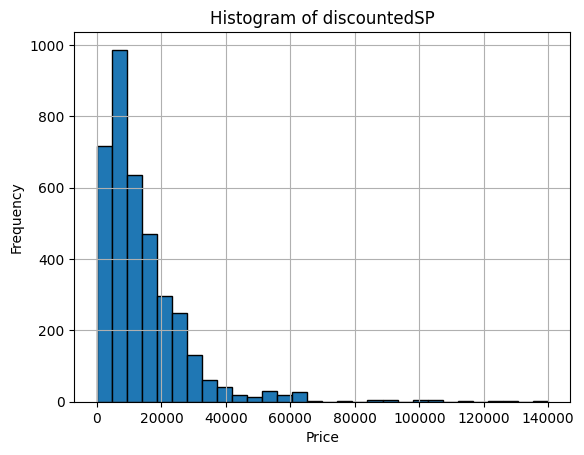

In [17]:
df['discountedSellingPrice'].hist(bins=30, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of discountedSP')
plt.show()

In [18]:
# need to scale as this is right skewed
df['discountedSellingPrice_logged'] = np.log(df['discountedSellingPrice'] + 1)  # Add 1 to avoid log(0)


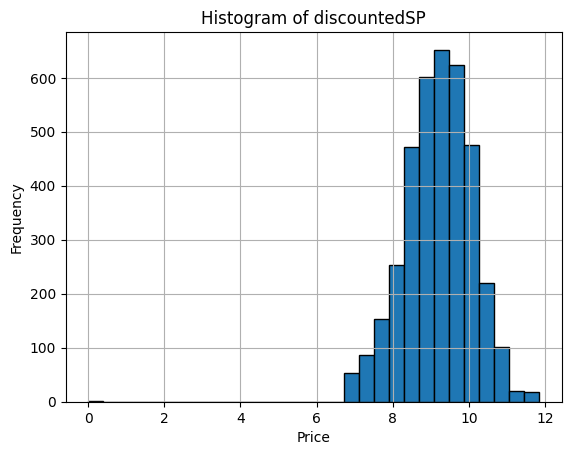

In [19]:
df['discountedSellingPrice_logged'].hist(bins=30, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of discountedSP')
plt.show()

In [20]:
Q1 = df['discountedSellingPrice_logged'].quantile(0.25)
Q3 = df['discountedSellingPrice_logged'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['discountedSellingPrice_logged'] >= lower_bound) & (df['discountedSellingPrice_logged'] <= upper_bound)]


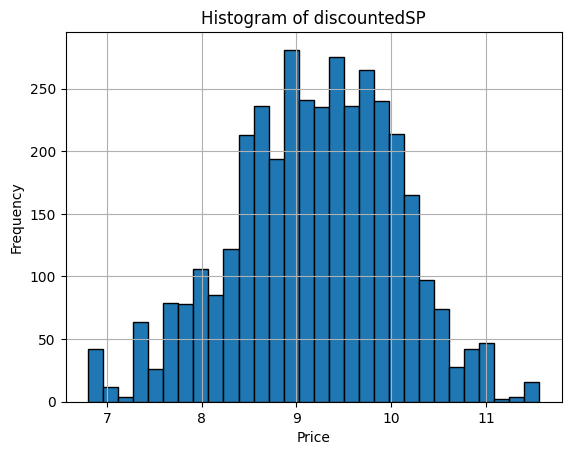

In [21]:
df['discountedSellingPrice_logged'].hist(bins=30, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of discountedSP')
plt.show()

In [22]:
df.drop('discountedSellingPrice', axis=1, inplace=True)

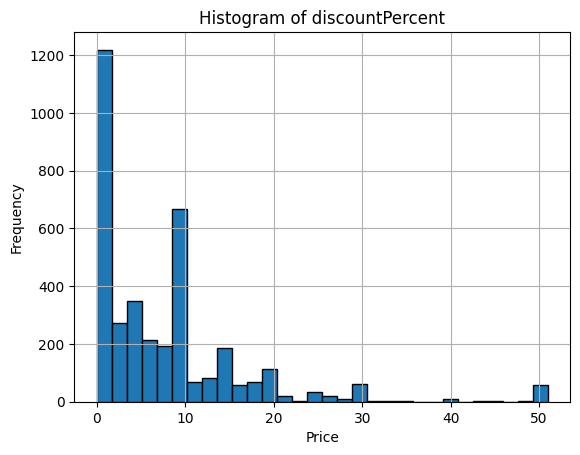

In [23]:
df['discountPercent'].hist(bins=30, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of discountPercent')
plt.show()

In [24]:
df['has_discount'] = (df['discountPercent'] > 0).astype(int)


In [25]:
# Log-transform positive discount values (just an example)
df['discountPercent_transformed'] = 0  # Default value
df.loc[df['discountPercent'] > 0, 'discountPercent_transformed'] = \
    df.loc[df['discountPercent'] > 0, 'discountPercent'].apply(np.log1p)


/tmp/ipykernel_104/798411137.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2.83321334 2.83321334 2.77258872 ... 1.38629436 1.09861229 2.77258872]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['discountPercent'] > 0, 'discountPercent_transformed'] = \


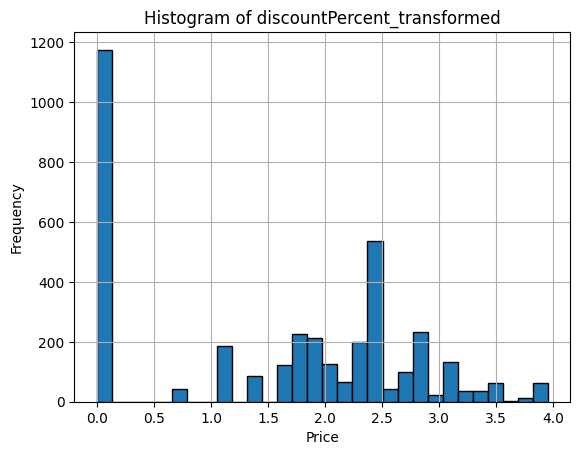

In [26]:
df['discountPercent_transformed'].hist(bins=30, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of discountPercent_transformed')
plt.show()

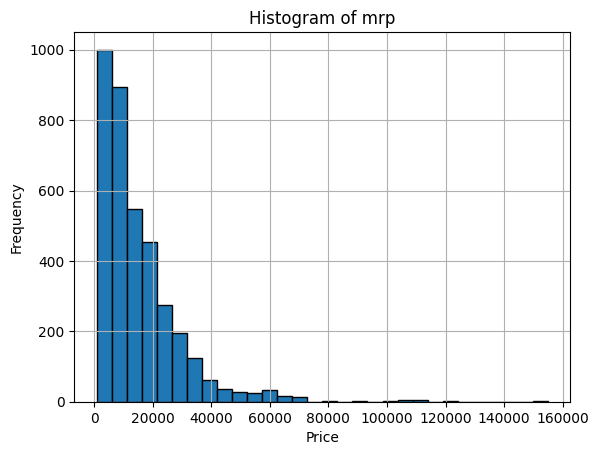

In [27]:
df['mrp'].hist(bins=30, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of mrp')
plt.show()

In [28]:
df['log_mrp'] = np.log1p(df['mrp'])
# for heavily right-skewed distribution

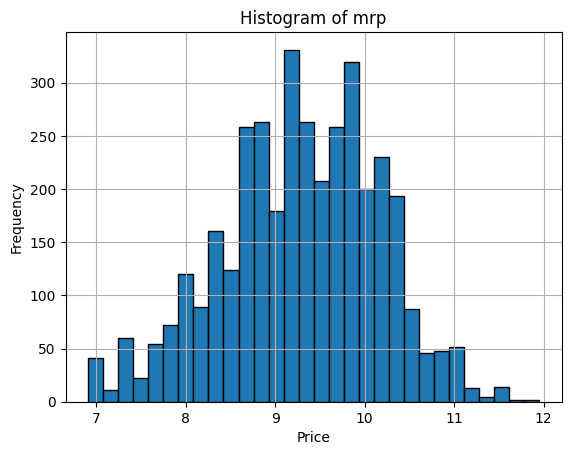

In [29]:
df['log_mrp'].hist(bins=30, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of mrp')
plt.show()

In [30]:
df.drop('mrp', axis=1, inplace=True)

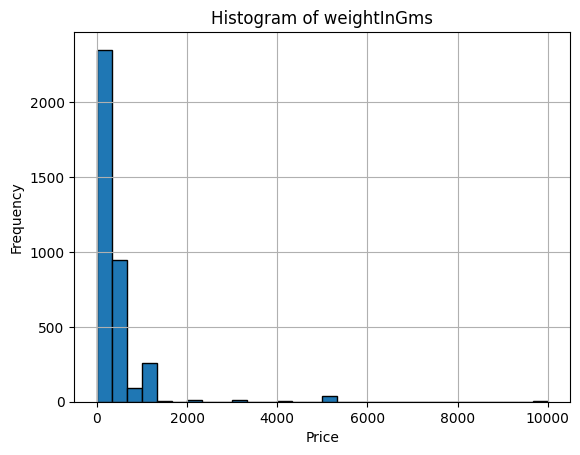

In [31]:
df['weightInGms'].hist(bins=30, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of weightInGms')
plt.show()

In [32]:
df['log_weightInGms'] = np.log1p(df['weightInGms'])


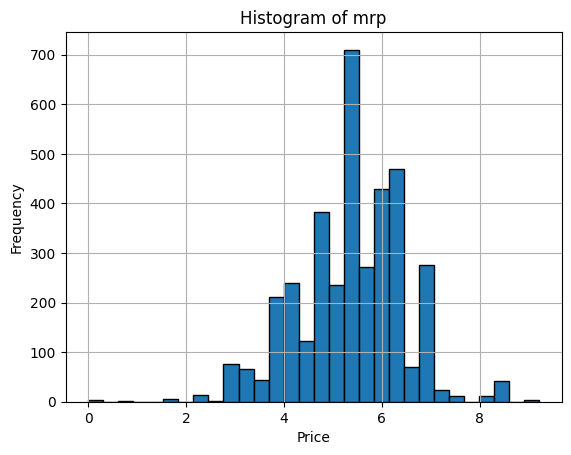

In [33]:
df['log_weightInGms'].hist(bins=30, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of mrp')
plt.show()

In [34]:
df.drop('weightInGms', axis=1, inplace=True)

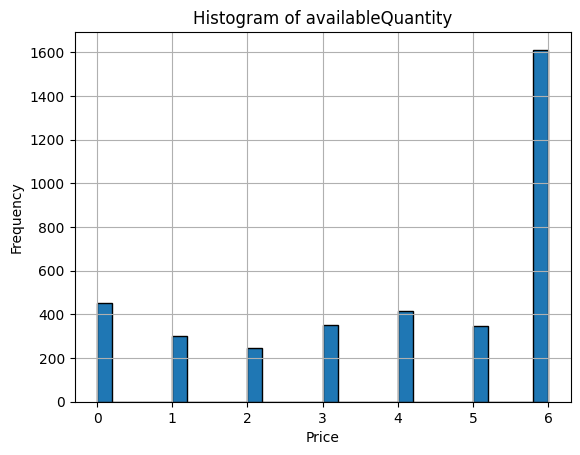

In [35]:
df['availableQuantity'].hist(bins=30, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of availableQuantity')
plt.show()

In [36]:
# count or frequency encoding for name column as there are 1681 names out of 3732 
# was thinking of thi but didn't really worked out

In [37]:
df.sample(10)

,discountPercent,availableQuantity,outOfStock,quantity,Cooking Essentials,Munchies,Packaged Food,Ice Cream & Desserts,Chocolates & Candies,Personal Care,...,"Dairy, Bread & Batter",Beverages,Health & Hygiene,Fruits & Vegetables,"Meats, Fish & Eggs",discountedSellingPrice_logged,has_discount,discountPercent_transformed,log_mrp,log_weightInGms
541,0,6,False,45,1,0,0,0,0,0,...,0,0,0,0,0,9.539716,0,0.000000,9.539716,3.828641
3045,10,6,False,25,0,0,0,0,0,1,...,0,0,0,0,0,9.105091,1,2.397895,9.210440,3.258097
840,10,4,False,500,0,1,0,0,0,0,...,0,0,0,0,0,8.748464,1,2.397895,8.853808,6.216606
3537,11,6,False,12,0,0,0,0,0,0,...,0,0,0,0,0,10.454524,1,2.484907,10.571343,6.546785
3265,15,1,False,24,0,0,0,0,0,0,...,0,0,0,0,0,10.502352,1,2.772589,10.666650,3.218876
52,16,3,False,250,0,0,0,0,0,0,...,0,0,0,1,0,8.160804,1,2.833213,8.343078,5.525453
1217,0,6,False,200,0,0,0,0,0,0,...,1,0,0,0,0,9.581973,0,0.000000,9.581973,5.303305
2242,5,6,False,200,0,0,0,0,1,0,...,0,0,0,0,0,9.148571,1,1.791759,9.200391,5.303305
2284,5,1,False,250,0,0,0,0,1,0,...,0,0,0,0,0,9.873080,1,1.791759,9.928229,5.525453
1860,26,6,False,52,0,0,0,1,0,0,...,0,0,0,0,0,8.909370,1,3.295837,9.210440,3.970292


In [38]:
df.shape

(3723, 23)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X=df.drop("outOfStock", axis=1)
y=df["outOfStock"]

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Logistic regression

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# confusion_matrix(y_test, y_pred_lr)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       640
        True       1.00      1.00      1.00       105

    accuracy                           1.00       745
   macro avg       1.00      1.00      1.00       745
weighted avg       1.00      1.00      1.00       745



In [43]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [44]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       640
        True       1.00      1.00      1.00       105

    accuracy                           1.00       745
   macro avg       1.00      1.00      1.00       745
weighted avg       1.00      1.00      1.00       745



In [45]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [46]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       640
        True       1.00      1.00      1.00       105

    accuracy                           1.00       745
   macro avg       1.00      1.00      1.00       745
weighted avg       1.00      1.00      1.00       745



In [47]:
# The results are very unrealistic, as these are 1 1 1 1 1 
# The data is imbalanced, so now we should deal with that

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [48]:
pip uninstall scikit-learn -y


Found existing installation: scikit-learn 1.3.2
Uninstalling scikit-learn-1.3.2:
  Successfully uninstalled scikit-learn-1.3.2
Note: you may need to restart the kernel to use updated packages.


In [49]:
!pip install scikit-learn==1.3.2 --quiet


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


In [52]:
import sklearn
import imblearn

print("scikit-learn version:", sklearn.__version__)
print("imbalanced-learn version:", imblearn.__version__)
from imblearn.over_sampling import SMOTE
print("SMOTE imported successfully")

scikit-learn version: 1.3.2
imbalanced-learn version: 0.13.0
SMOTE imported successfully


In [54]:
# I will use SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)


In [55]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [56]:
oversampled_data = pd.concat([pd.DataFrame(y_train_resampled), pd.DataFrame(X_train_resampled)], axis=1)

In [57]:
oversampled_data["outOfStock"].value_counts()

outOfStock
False    2452
True     2452
Name: count, dtype: int64

In [58]:
oversampled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4904 entries, 0 to 4903
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   outOfStock                     4904 non-null   bool   
 1   discountPercent                4904 non-null   int64  
 2   availableQuantity              4904 non-null   int64  
 3   quantity                       4904 non-null   int64  
 4   Cooking Essentials             4904 non-null   int64  
 5   Munchies                       4904 non-null   int64  
 6   Packaged Food                  4904 non-null   int64  
 7   Ice Cream & Desserts           4904 non-null   int64  
 8   Chocolates & Candies           4904 non-null   int64  
 9   Personal Care                  4904 non-null   int64  
 10  Paan Corner                    4904 non-null   int64  
 11  Home & Cleaning                4904 non-null   int64  
 12  Biscuits                       4904 non-null   i

In [65]:
# Logistic regression

from sklearn.model_selection import cross_val_score
model = LogisticRegression(max_iter=1000)
scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5)
print("Cross-Validation Accuracy Scores:", scores)

Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]


In [69]:
from sklearn.model_selection import cross_val_score
model = DecisionTreeClassifier()
scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5)
print("Cross-Validation Accuracy Scores:", scores)

Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]


In [70]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    class_weight='balanced'
)
scores = cross_val_score(rf, X_train_resampled, y_train_resampled, cv=5)
print("Cross-Validation Accuracy Scores:", scores)

Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]


In [ ]:
# again, the results are a lot of 1s now using gridsearchcv

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


In [72]:
models_and_parameters = {
    'LogisticRegression': {
        'model': LogisticRegression(solver='liblinear', max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'penalty': ['l1', 'l2']
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'max_features': ['sqrt']
        }
    },
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    },
    'SVC': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    }
}


In [73]:
best_models = {}

for name, mp in models_and_parameters.items():
    print(f"Running GridSearchCV for {name}")
    grid = GridSearchCV(
        estimator=mp['model'],
        param_grid=mp['params'],
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=0
    )
    grid.fit(X_train_resampled, y_train_resampled)
    best_models[name] = {
        'best_score': grid.best_score_,
        'best_params': grid.best_params_,
        'best_estimator': grid.best_estimator_
    }
    print(f"{name} - Best Score: {grid.best_score_}")
    print(f"{name} - Best Params: {grid.best_params_}")


Running GridSearchCV for LogisticRegression
LogisticRegression - Best Score: 1.0
LogisticRegression - Best Params: {'C': 0.1, 'penalty': 'l1'}
Running GridSearchCV for RandomForestClassifier
RandomForestClassifier - Best Score: 1.0
RandomForestClassifier - Best Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
Running GridSearchCV for DecisionTreeClassifier
DecisionTreeClassifier - Best Score: 1.0
DecisionTreeClassifier - Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Running GridSearchCV for KNeighborsClassifier
KNeighborsClassifier - Best Score: 0.978997898853731
KNeighborsClassifier - Best Params: {'n_neighbors': 3, 'weights': 'distance'}
Running GridSearchCV for SVC
SVC - Best Score: 1.0
SVC - Best Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [75]:
# Interpretation: What Might Be Going Wrong?
# 1. Overfitting due to SMOTE + Train-Test Leakage
    # If we're applying SMOTE before train-test split, you're leaking synthetic data into the test set. That can cause inflated scores.
    # Fix: Apply SMOTE only after splitting data.

# 2. Small Dataset / Low Variance
    # If the dataset is small or very imbalanced, classifiers can memorize the training data, especially tree-based models.
    # Noisy or Constant Target

# 3. If target classes are nearly all one class or incorrectly labeled, metrics can be misleading.
    # Cross-Validation Done on Pre-processed (Leaky) Data
    # If scaling or SMOTE is applied before cross-validation (instead of within a pipeline), the model sees information from the validation fold.

# The Most Realistic Score: KNeighborsClassifier (0.978)
# That result is:
    # Below 1.0,
    # Varies with hyperparameters,
    # Suggests generalization error.

# This is a strong indication that this is the only trustworthy score so far.

